### Деревья

In [57]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [59]:
independent_features = ['Maths rating', 'Russian rating']
target_feature = ['Sex']

df_cut = df[independent_features + target_feature]
df_cut = df_cut.dropna()
df_cut = df_cut.sample(167)

df_test_cut = df_test[independent_features + target_feature]
df_test_cut = df_test_cut.dropna()

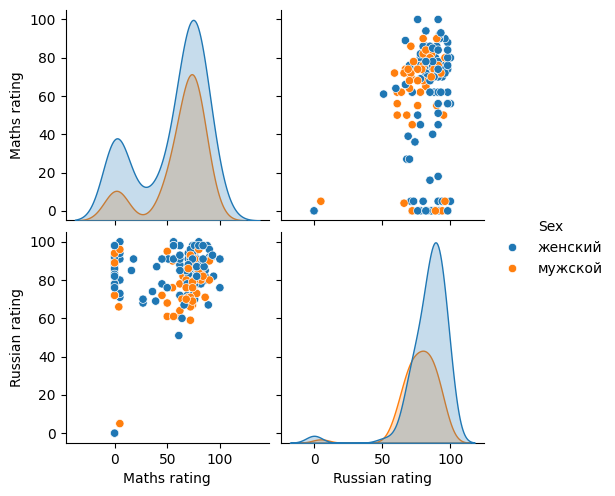

In [60]:
sns.pairplot(df_cut, hue='Sex')

[Text(0.5301724137931034, 0.9166666666666666, 'x[1] <= 81.5\ngini = 0.457\nsamples = 167\nvalue = [108, 59]'),
 Text(0.21551724137931033, 0.75, 'x[0] <= 42.0\ngini = 0.499\nsamples = 67\nvalue = [32, 35]'),
 Text(0.10344827586206896, 0.5833333333333334, 'x[0] <= 16.0\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[1] <= 2.5\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.034482758620689655, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10344827586206896, 0.25, 'x[1] <= 68.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.06896551724137931, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13793103448275862, 0.08333333333333333, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.13793103448275862, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3275862068965517, 0.5833333333333334, 'x[0] <= 78.5\ngini = 0.477\nsamples = 51\nvalue = [20, 31]'),
 Text(0.206896551724

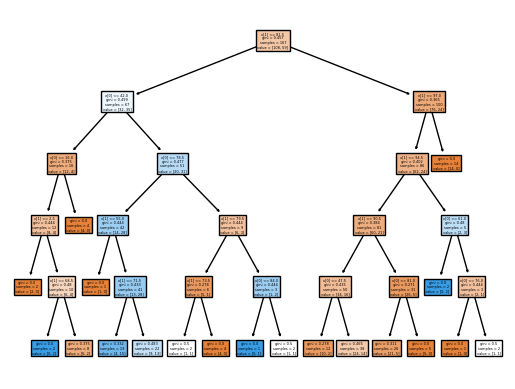

In [61]:
tree_model = tree.DecisionTreeClassifier(max_depth=5)
tree_model.fit(df_cut[independent_features].values.reshape(-1, len(independent_features)), y=df_cut['Sex'].values)
tree.plot_tree(tree_model, filled=True)

In [62]:
df_test_cut['Predicted'] = tree_model.predict(df_test_cut[independent_features].values.reshape(-1, len(independent_features)))

In [63]:
# Матрица смежности показывающая, сколько было угадано верно, сколько ошибочно
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,47,24
мужской,15,12


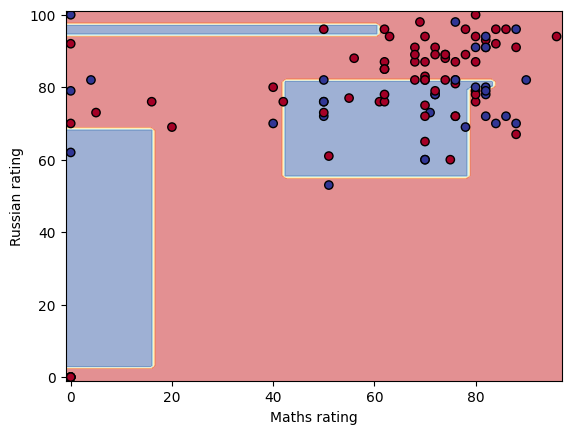

In [64]:
# Визуализация результатов
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(df_test_cut['Sex'])


data_reshaped = df_test_cut[independent_features].values.reshape(-1, len(independent_features))
disp = DecisionBoundaryDisplay.from_estimator(
    tree_model, data_reshaped, response_method="predict",
    xlabel=independent_features[0], ylabel=independent_features[1],
    alpha=0.5,
    cmap=plt.cm.RdYlBu
)
disp.ax_.scatter(data_reshaped[:, 0], data_reshaped[:, 1], c=encoded_gender, cmap=plt.cm.RdYlBu, edgecolor="k")

# Метрики оценки точности предсказания:

**recall** - доля правильно проклассифицированных объектов среди всех объектов являющихся в действительности представителями данного класса. Например: доля верно предсказанных женщин **среди всех женщин**

**precision** - доля правильно проклассифицированных объектов среди всех объектов отнесенных моделью к этому классу. Например, доля правильно предсказанных мужчин среди всех объектов, **которые модель определила как мужчин**

In [31]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.98387097, 0.97222222]),
 array([0.98387097, 0.97222222]),
 array([0.98387097, 0.97222222]),
 array([62, 36]))

Формат вывода:

1 строка: (precision_для_женщин, precision_для_мужчин)

2 строка: (recall_для_женщин, recall_для_мужчин)

3 строка: (f1_для_женщин, f1_для_мужчин)

4 строка: (количество_женщин, количесво_мужчин)

# Задача регрессии. Дерево решений

In [ ]:
independent_features = ['Year of birth', 'Month of birthday']
target_feature = ['Age']

df_cut_reg = df[independent_features + target_feature]
df_cut_reg = df_cut_reg.dropna()

df_test_cut_reg = df_test[independent_features + target_feature]
df_test_cut_reg = df_test_cut_reg.dropna()

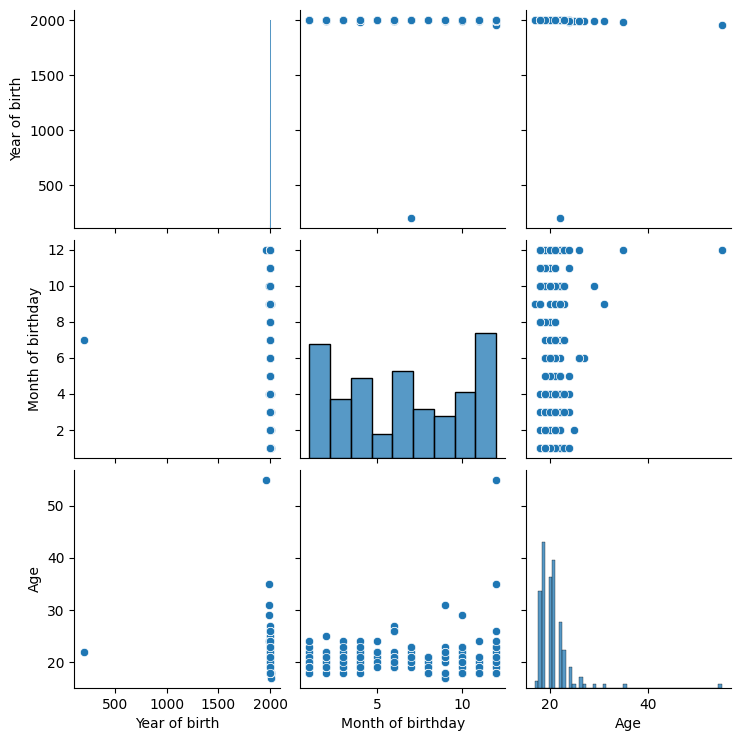

In [ ]:
sns.pairplot(df_cut_reg)

In [ ]:

# Создаем модель и тренируем её
regress_tree_model = tree.DecisionTreeRegressor(max_depth=3)
regress_tree_model.fit(df_cut_reg[independent_features].values.reshape(-1, len(independent_features)), df_cut_reg[target_feature].values)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 1996.5\nsquared_error = 11.967\nsamples = 186\nvalue = 20.688'),
 Text(0.25, 0.625, 'x[1] <= 11.0\nsquared_error = 80.89\nsamples = 10\nvalue = 30.1'),
 Text(0.125, 0.375, 'x[1] <= 8.0\nsquared_error = 7.673\nsamples = 7\nvalue = 26.429'),
 Text(0.0625, 0.125, 'squared_error = 3.2\nsamples = 5\nvalue = 25.0'),
 Text(0.1875, 0.125, 'squared_error = 1.0\nsamples = 2\nvalue = 30.0'),
 Text(0.375, 0.375, 'x[0] <= 1973.0\nsquared_error = 146.889\nsamples = 3\nvalue = 38.667'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(0.4375, 0.125, 'squared_error = 20.25\nsamples = 2\nvalue = 30.5'),
 Text(0.75, 0.625, 'x[0] <= 2001.5\nsquared_error = 2.732\nsamples = 176\nvalue = 20.153'),
 Text(0.625, 0.375, 'x[0] <= 1999.5\nsquared_error = 1.28\nsamples = 83\nvalue = 21.578'),
 Text(0.5625, 0.125, 'squared_error = 0.628\nsamples = 22\nvalue = 23.091'),
 Text(0.6875, 0.125, 'squared_error = 0.392\nsamples = 61\nvalue = 21.033'),
 Text(0.875, 

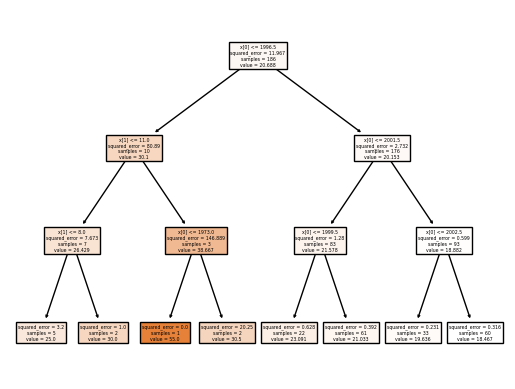

In [ ]:
tree.plot_tree(regress_tree_model, filled=True)

In [ ]:
df_test_cut_reg['Predicted'] = regress_tree_model.predict(df_test_cut_reg[independent_features].values.reshape(-1, len(independent_features)))
df_test_cut_reg.head(10)

,Year of birth,Month of birthday,Age,Predicted
0,2000,6,22,21.032787
1,2002,3,20,19.636364
2,2001,6,21,21.032787
3,2001,7,21,21.032787
4,2000,5,22,21.032787
5,2001,8,21,21.032787
6,2003,12,18,18.466667
7,1996,11,25,30.000000
8,2001,7,21,21.032787
9,2000,8,22,21.032787


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test_cut_reg[target_feature], df_test_cut_reg['Predicted'])

0.7241329318612689